### Error Analysis of koBERT

In [1]:
import json
import pandas as pd

In [2]:
data = pd.read_csv('./data/sent_pred_label.csv')
data

,pred,label,big_sent
0,"가난한, 불우한","가난한, 불우한",상처
1,한심한,"가난한, 불우한",상처
2,"가난한, 불우한","가난한, 불우한",상처
3,두려운,"가난한, 불우한",상처
4,"가난한, 불우한","가난한, 불우한",상처
...,...,...,...
5125,희생된,희생된,상처
5126,상처,희생된,상처
5127,불안,희생된,상처
5128,희생된,희생된,상처


In [3]:
idx_to_sent = {0: '가난한, 불우한',
 1: '감사하는',
 2: '걱정스러운',
 3: '고립된',
 4: '괴로워하는',
 5: '구역질 나는',
 6: '기쁨',
 7: '낙담한',
 8: '남의 시선을 의식하는',
 9: '노여워하는',
 10: '눈물이 나는',
 11: '느긋',
 12: '당혹스러운',
 13: '당황',
 14: '두려운',
 15: '마비된',
 16: '만족스러운',
 17: '방어적인',
 18: '배신당한',
 19: '버려진',
 20: '부끄러운',
 21: '분노',
 22: '불안',
 23: '비통한',
 24: '상처',
 25: '성가신',
 26: '스트레스 받는',
 27: '슬픔',
 28: '신뢰하는',
 29: '신이 난',
 30: '실망한',
 31: '악의적인',
 32: '안달하는',
 33: '안도',
 34: '억울한',
 35: '열등감',
 36: '염세적인',
 37: '외로운',
 38: '우울한',
 39: '자신하는',
 40: '조심스러운',
 41: '좌절한',
 42: '죄책감의',
 43: '질투하는',
 44: '짜증내는',
 45: '초조한',
 46: '충격 받은',
 47: '취약한',
 48: '툴툴대는',
 49: '편안한',
 50: '한심한',
 51: '혐오스러운',
 52: '혼란스러운',
 53: '환멸을 느끼는',
 54: '회의적인',
 55: '후회되는',
 56: '흥분',
 57: '희생된'}

In [4]:
sent_to_idx = {}

for k, v in idx_to_sent.items():
    sent_to_idx[v] = k
sent_to_idx

{'가난한, 불우한': 0,
 '감사하는': 1,
 '걱정스러운': 2,
 '고립된': 3,
 '괴로워하는': 4,
 '구역질 나는': 5,
 '기쁨': 6,
 '낙담한': 7,
 '남의 시선을 의식하는': 8,
 '노여워하는': 9,
 '눈물이 나는': 10,
 '느긋': 11,
 '당혹스러운': 12,
 '당황': 13,
 '두려운': 14,
 '마비된': 15,
 '만족스러운': 16,
 '방어적인': 17,
 '배신당한': 18,
 '버려진': 19,
 '부끄러운': 20,
 '분노': 21,
 '불안': 22,
 '비통한': 23,
 '상처': 24,
 '성가신': 25,
 '스트레스 받는': 26,
 '슬픔': 27,
 '신뢰하는': 28,
 '신이 난': 29,
 '실망한': 30,
 '악의적인': 31,
 '안달하는': 32,
 '안도': 33,
 '억울한': 34,
 '열등감': 35,
 '염세적인': 36,
 '외로운': 37,
 '우울한': 38,
 '자신하는': 39,
 '조심스러운': 40,
 '좌절한': 41,
 '죄책감의': 42,
 '질투하는': 43,
 '짜증내는': 44,
 '초조한': 45,
 '충격 받은': 46,
 '취약한': 47,
 '툴툴대는': 48,
 '편안한': 49,
 '한심한': 50,
 '혐오스러운': 51,
 '혼란스러운': 52,
 '환멸을 느끼는': 53,
 '회의적인': 54,
 '후회되는': 55,
 '흥분': 56,
 '희생된': 57}

In [5]:
idx_pred = []
idx_label = []

for pred in data['pred']:
    idx_pred.append(sent_to_idx[pred])

for label in data['label']:
    idx_label.append(sent_to_idx[label])

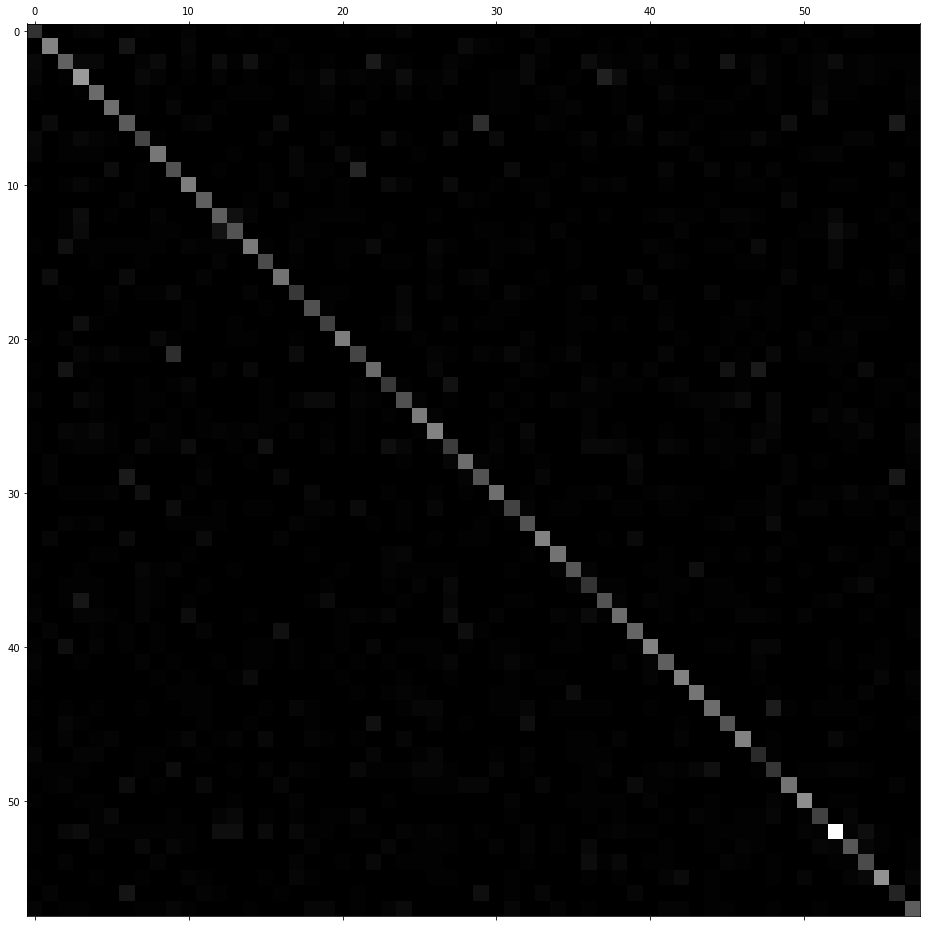

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mx = confusion_matrix(idx_pred, idx_label)

plt.rcParams['figure.figsize'] = (20, 20)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

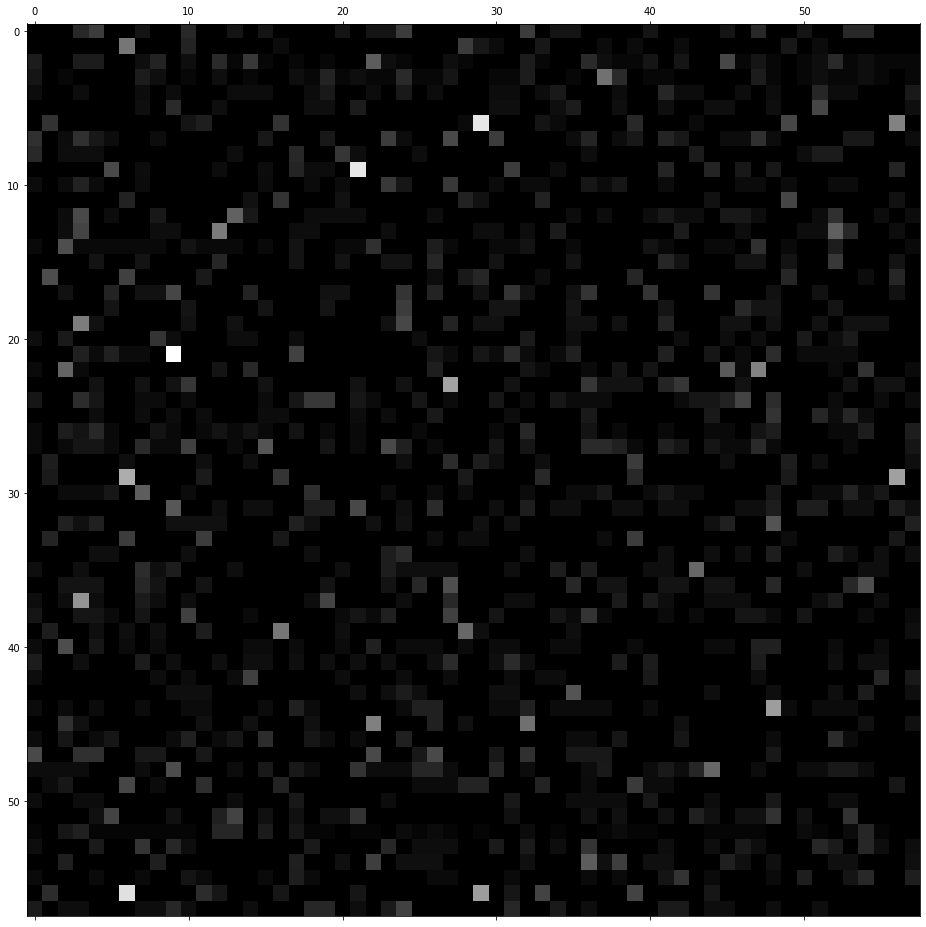

In [7]:
from matplotlib.pyplot import axes
import numpy as np
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0) # 다른 항목은 그대로 유지하고, 주대각선만 0으로 채움
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [8]:
print(idx_to_sent[7])
print(idx_to_sent[8])
print(idx_to_sent[47])

낙담한
남의 시선을 의식하는
취약한


In [9]:
score = pd.read_csv('./data/acc_score.csv')
target = score[score['score'] < score['score'].mean()]
target

,big_sent,sent,acc,total,score
0,기쁨,흥분,18.0,61.0,0.295082
1,기쁨,기쁨,45.0,102.0,0.441176
2,기쁨,신이 난,41.0,91.0,0.450549
10,당황,혐오스러운,32.0,67.0,0.477612
11,당황,고립된,76.0,152.0,0.500000
12,당황,외로운,41.0,80.0,0.512500
19,분노,툴툴대는,27.0,95.0,0.284211
20,분노,방어적인,28.0,73.0,0.383562
21,분노,노여워하는,40.0,103.0,0.388350
22,분노,분노,34.0,86.0,0.395349


In [10]:
for target in target['sent']:
    print('sent:', target, 'id:', sent_to_idx[target])

sent: 흥분 id: 56
sent: 기쁨 id: 6
sent: 신이 난 id: 29
sent: 혐오스러운 id: 51
sent: 고립된 id: 3
sent: 외로운 id: 37
sent: 툴툴대는 id: 48
sent: 방어적인 id: 17
sent: 노여워하는 id: 9
sent: 분노 id: 21
sent: 안달하는 id: 32
sent: 악의적인 id: 31
sent: 좌절한 id: 41
sent: 취약한 id: 47
sent: 회의적인 id: 54
sent: 걱정스러운 id: 2
sent: 초조한 id: 45
sent: 당혹스러운 id: 12
sent: 가난한, 불우한 id: 0
sent: 상처 id: 24
sent: 버려진 id: 19
sent: 괴로워하는 id: 4
sent: 염세적인 id: 36
sent: 슬픔 id: 27
sent: 비통한 id: 23
sent: 낙담한 id: 7
sent: 마비된 id: 15
sent: 환멸을 느끼는 id: 53


#### Conversation To ChatBot Dataset

In [75]:
import os
path = './data/Conversation'
filenames = os.listdir(path)

find_word = '.xlsx'
lst = [s for s in filenames if find_word in s]
lst

['A 음식점(15,726)_new.xlsx',
 'B 의류(15,826)_new.xlsx',
 'C 학원(4,773)_new.xlsx',
 'D 소매점(14,949)_new.xlsx',
 'E 생활서비스(11,087)_new.xlsx',
 'F 카페(7,859)_new.xlsx',
 'G 숙박업(7,113)_new.xlsx',
 'H 관광여가오락(4,949)_new.xlsx',
 'I 부동산(8,131)_new.xlsx']

In [82]:
Q = []
A = []

for file in lst:
    data = pd.read_excel(path + '/' + file)
    for i in range(len(data)):
        try:
            if (data.loc[i]['QA'] == 'Q') & (data.loc[i+1]['QA'] == 'A'):
                Q.append(data.loc[i]['SENTENCE'])
                A.append(data.loc[i+1]['SENTENCE'])
        except:
            pass

In [83]:
len(Q), len(A)

(36454, 36454)

In [88]:
import os
path = './data/Conversation/J 민원/'
filenames = os.listdir(path)
filenames

['교통_최종본(0416).xlsx',
 '상수도_최종본(0416).xlsx',
 '여권 최종본(0416).xlsx',
 '차량등록_최종본(0429).xlsx']

In [97]:
data = pd.DataFrame()
for file in filenames:
    temp = pd.read_excel(path + '/' + file)
    print(len(temp))
    data = pd.concat([data, temp] , axis=0)

667
726
403
3746


In [100]:
for question in data['question']:
    Q.append(question)

for answer in data['answer']:
    A.append(answer)

In [101]:
len(Q), len(A)

(41996, 41996)

In [150]:
import os
temp_Q = []
temp_A = []

path = './data/Talk'
dirlst = os.listdir(path)
for dir in dirlst:
    ddirlst = os.listdir(path + '/' + dir)
    for ddir in ddirlst:
        dddirlst = os.listdir(path + '/' + dir + '/' + ddir)
        for dddir in dddirlst:
            files = os.listdir(path + '/' + dir + '/' + ddir + '/' + dddir)
            for file in files:
                data = pd.read_table(path+'/'+dir+'/'+ddir+'/'+dddir+'/'+file, header=None)
                SENTENCES = data[0]
                for idx, sen in enumerate(SENTENCES):
                    try:
                        temp = sen.split(':')[1][1:]
                    except:
                        pass
                    if (len(SENTENCES)%2 == 1) & (idx==len(SENTENCES)-1):
                        pass
                    elif (idx % 2 == 1):
                        Q.append(temp)
                    elif (idx % 2 == 0):
                        A.append(temp)

In [121]:
data = pd.read_table('./data/Talk/1.Training/원천데이터/TS_01. KAKAO/KAKAO_898_15.txt', header=None)
# data[0][0][0] == SPEAKER

# SENTENCE STARTING POINT
data[0][0].split(':')[1][1:]

'이번에 캘리포니아에 산불 난 거 보셨어요?'

In [135]:
data[0][0].split(':')[1][1:]

'나도 다른 나라는 모르겠는데 우리나라도 뭐 꾸준히 방송계 블랙리스트나 방송국 편파 방송 이런 게 있었잖아.'

In [139]:
for idx, i in enumerate(SENTENCES):
    try:
        i.split(':')[1][1:]
    except:
        print(i)

열차 타니고


In [140]:
SENTENCES

0     1 : 나도 다른 나라는 모르겠는데 우리나라도 뭐 꾸준히 방송계 블랙리스트나 방송국...
1                             3 : 일본은 어떤데 일본은 아예 모른다 진짜
2                 1 : 나두... 외국은 진짜 잘 모르는데 특히 일본은 처음 들어봄
3                    2 : 에바야 일본 진짜 사람들 거의 진실을 모름 답답해 죽어
4                                 3 : 일본은 그거 현금쓰는 이유 아냐
5                             1 : 현금? 카드 못써...? 가봤어야 알지
6                                   2 : 키키 뭔데 뭘까 뭘까나 몰라
7         3 : 하도 일본에서 은행으로 뭔 짓 해서 사람들이 은행 못 믿고 현금 쓰는 거래
8                          1 : 일본 정부에서 은행 돈으로 조작하고 그래서?
9                       2 : 맞아 들은 적 있음 사람들이 카드 못 믿는데 키키
10                                2 : 처음엔 어이없었는데 알 거 같음
11                      3 : 은행에 돈을 넣었는데 내 맘대로 돈을 못 빼는 거
12         1 : 엥 왜요...? 난 그럼 은행 불지름 돈미새라 내 돈 건드는 거 못 참지
13                             2 : 일본 부채도 엄청난데 사람들 잘 모름
14                     3 : 일본에서 태어나는 게 소원이었는데 실상을 잘 몰랐군
15              1 : 난 우리나라에 만족하고 사는 편이라... 그냥 앞으로도 만족할래
16                            2 : 일본에서 태어나는 게 왜 소원이야 키키
17                                3 : 그 일본 감성이 너

In [141]:
data

,0
0,1 : 나도 다른 나라는 모르겠는데 우리나라도 뭐 꾸준히 방송계 블랙리스트나 방송국...
1,3 : 일본은 어떤데 일본은 아예 모른다 진짜
2,1 : 나두... 외국은 진짜 잘 모르는데 특히 일본은 처음 들어봄
3,2 : 에바야 일본 진짜 사람들 거의 진실을 모름 답답해 죽어
4,3 : 일본은 그거 현금쓰는 이유 아냐
5,1 : 현금? 카드 못써...? 가봤어야 알지
6,2 : 키키 뭔데 뭘까 뭘까나 몰라
7,3 : 하도 일본에서 은행으로 뭔 짓 해서 사람들이 은행 못 믿고 현금 쓰는 거래
8,1 : 일본 정부에서 은행 돈으로 조작하고 그래서?
9,2 : 맞아 들은 적 있음 사람들이 카드 못 믿는데 키키


In [151]:
len(Q), len(A)

(852268, 852268)

In [152]:
path = './data/Multimodal_Script/'
filenames = os.listdir(path)
for file in filenames:
    data = pd.read_csv(path + '/' +file)

['Script_for_all.csv',
 'script_part_06.csv',
 'script_part_1.csv',
 'script_part_11.csv',
 'script_part_2_4_9_10.csv',
 'script_part_3.csv',
 'script_part_5.csv',
 'script_part_7.csv',
 'script_part_8.csv']

In [187]:
temp_Q = []
temp_A = []

path = './data/Multimodal_Script/'
filenames = os.listdir(path)

data = pd.read_csv('./data/Multimodal_Script/Script_for_all.csv')
count = 0
for i in range(len(data)):
    try:
        if (data.loc[i]['A'] == data.loc[i+1]['Q']) & (data.loc[i]['Q'] != data.loc[i-1]['A']):
            if count%2 == 1:
                Q.pop()
            Q.append(data.loc[i]['Q'])
            A.append(data.loc[i]['A'])
            count = 0
    except:
        Q.append(data.loc[i]['Q'])
        A.append(data.loc[i]['A'])
    else:
        if count%2 != 1 :
            Q.append(data.loc[i]['A'])
            count += 1
        elif count%2 == 1:
            A.append(data.loc[i]['A'])
            count += 1


In [188]:
len(temp_Q), len(temp_A)

(0, 0)

In [189]:
len(Q), len(A)

(858567, 858567)

In [193]:
data = pd.DataFrame([Q, A]).T
data.columns = ['Question', 'Answer']
data.to_csv('ChatBot_Data.csv', encoding='utf-8', index=False)